# Assignment 3

As before, questions that require identification and/or interpretation will not penalized for brevity of response: if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

### Question 1: Data cleaning and visualization

For this assignment, we'll use the in-built dataset `credit` from `ISLP` library.

In [3]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import seaborn as sns

# Import specific objects
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly,
                         contrast)

# Load dataset
credit = load_data('credit')
credit

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


Before modeling, it's essential to "get a feel" for our data. Use the `credit` function to answer the following questions:

_(i)_ How many variables (columns) are there?  

_(ii)_ How many observations (rows) are there?  

_(iii)_ How many factor variables are there?  

_(iv)_ What are the factor labels (English) and levels (value) of the `Married` variable?


_(v)_ What is the range of the `Cards` variable?

_(vi)_  It is very important to understand if our data has missing values, which are represents as `NA`. Below, show that there are 0 NA values in the dataset. (Hint: you can use the function `np.isnan()` to search for `NA` values, and wrap that with the `sum()` function, to provide a total count.)

In [4]:
# Add your code here

It is also very important to visualize our data before modeling. The `sns.pairplot()` function visualizes the pair-wise correlations between all variables.

In [5]:
le = LabelEncoder()
plot_df = credit.copy()
plot_df['Ethnicity'] = le.fit_transform(plot_df['Ethnicity'])
plot_df['Ethnicity']

0      2
1      1
2      1
3      1
4      2
      ..
395    2
396    0
397    2
398    2
399    1
Name: Ethnicity, Length: 400, dtype: int64

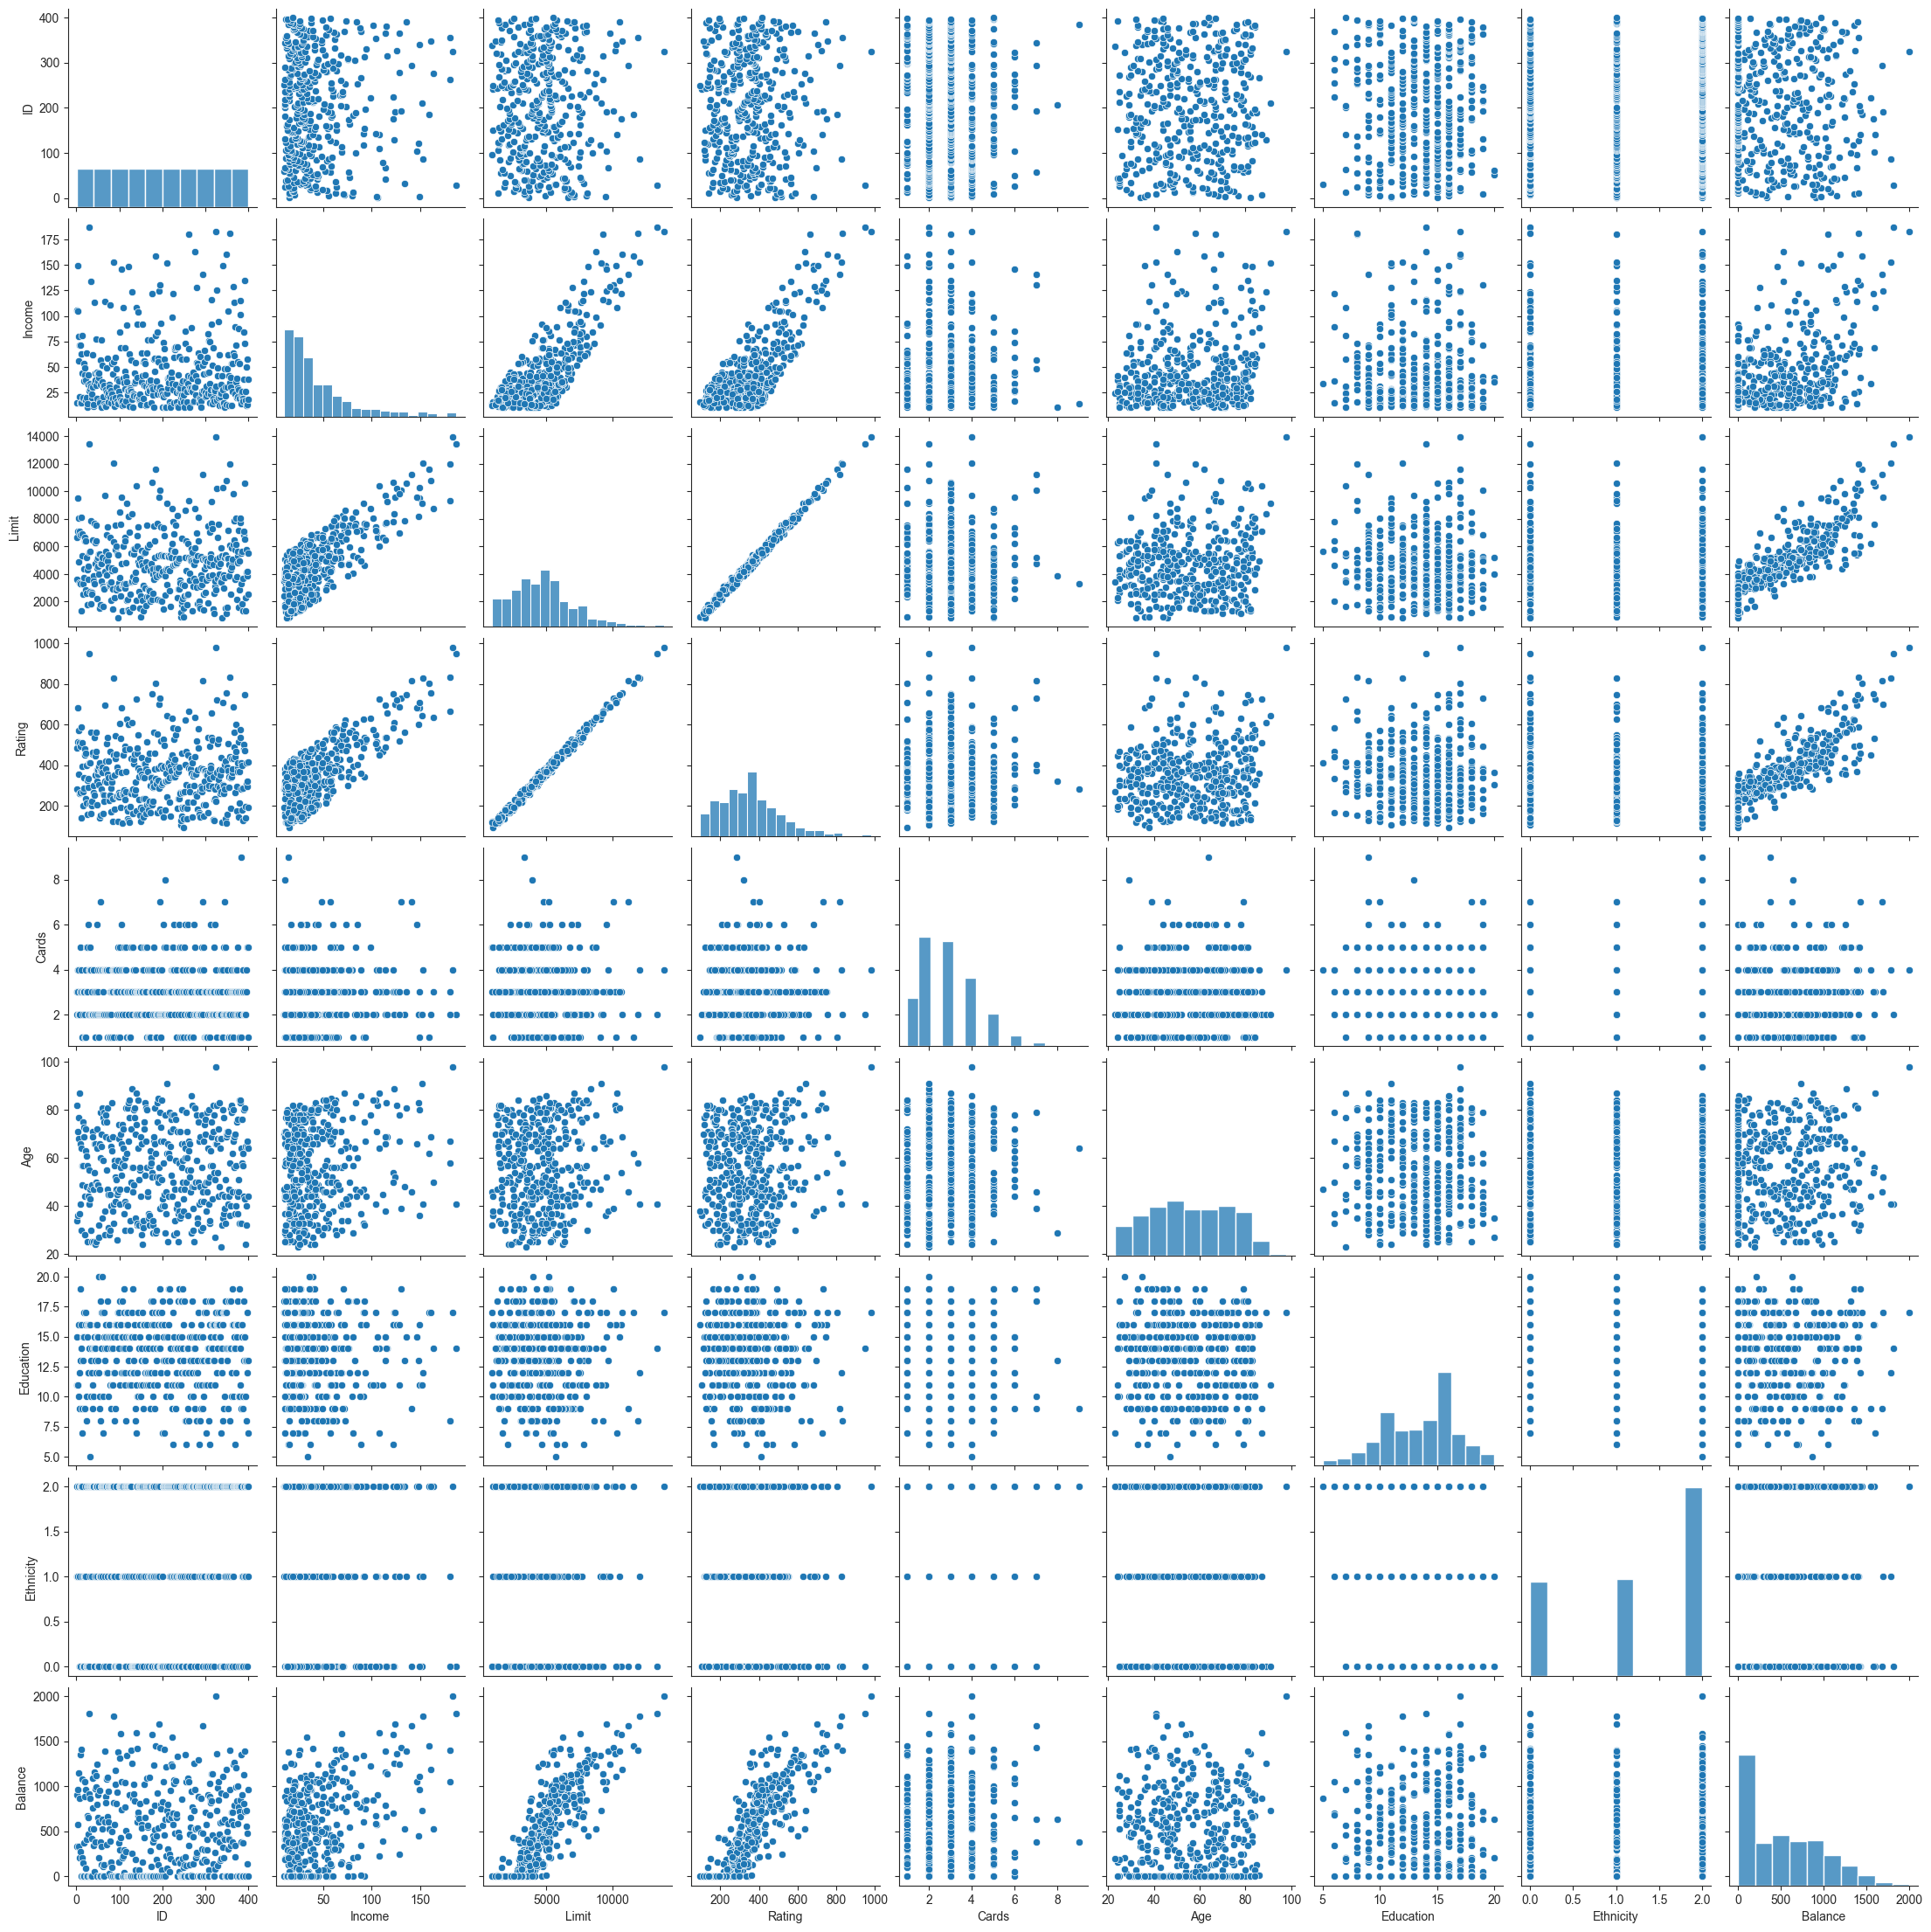

In [6]:
numeric_columns = plot_df.select_dtypes(include=['float64', 'int64'])

# Create a scatterplot matrix
sns.set_style("ticks")
sns.pairplot(numeric_columns)

_(vii)_ Which variable pair looks as if it has the strongest correlation?  

_(viii)_ Name a variable pair that looks as though it has no/little correlation (many correct answers). 

_(ix)_  Why do correlation pairs including the `Ethnicity` variable have three columns/rows of points?

Congrats! Now that our data is familiar and 'clean', let's turn to modeling.

### Question 2: Regularization via Shrinkage

Shrinkage methods can "extend" or improve upon linear model fits, by pushing coefficients towards (ridge regression) or to zero (lasso), and thus reducing variance. We will perform ridge regression, using the `skl.ElasticNet()` function. 

Use our `credit` dataset (deriving from Credit). Let's use `Balance` as the response variable, and all other variables as predictors. 

_(i)_ A necessary first step is to get our data into the format expected. Specifically, we must provide predictor variables in a matrix, and the response variable in a vector.
As we'll be doing GridSearchCV, let's keep the whole dataset for training.

Let's use `sm.add_constant()` to add the intercept, and `pd.get_dummies()` to get dummy variables from the categorical variables. How many predictors do we have now ?

In [7]:
# Add your code here


Now that we have changed how our data is represented, we can move on to modelling. Fit a ridge regression model, using `skl.ElasticNet()`. (Hint: remember to set the alpha value!)

In [8]:
# Add your code here


_(v)_ An essential part of ridge regression (and shrinkage methods more broadly) is to identify an 'ideal' lambda value. Use the appropriate function `ElasticNetCV` from `sk.learn` to identify this lambda value via cross-validation.


In [9]:
# Add your code here


_(vi)_ The cross-validated model object that you created in the step above stores the number of lambda values you gave. Print them here (Hint: use the `alphas_` method from it on your `ElasticNetCV` object to get the lambdas)

In [10]:
# Add your code here


_(vii)_ Visualize your cross-validation results using `plot` from `plt` to plot the mean test score against the alpha values on a log-scale (i.e take the log10 of the alphas). Do you notice anything ? 

In [11]:
# Add your code here


_(viii)_ Now, look inside your cross-validated object to pull out the lambda value with the smallest error (Hint: the value will be that shown by the first, left-most vertical dotted line.) Any remarks ?

In [12]:
# Add your code here


### Question 3: Decision (regression) tree

Decision trees partition a dataset into smaller subgroups, and then fit a constant for every observation in a given subgroup. This method is well-able to model non-linear associations, and can be helpfully visualized.

Let's continue to work with `credit` (deriving from the `Credit` dataset). We will use the `tree` library.

_(i)_ Below, fit a tree in the training set. Use `Balance` as the response variable, and all other variables as predictors. 

In [13]:
# Add your code here


_(ii)_ Plot your tree, with text, using the function `plot_tree`.

In [14]:
# Add your code here


Review the plot and/or the model `summary` to answer the following questions:

_(iii)_ What is the most important variable for predicting `Balance` (Hint: what variable is at the top of the tree, i.e., the "root")?  

_(iv)_ How many terminal nodes ("leafs") are there?

_(v)_ What is the tree's error? (Hint: Look for `Residual mean deviance`)

_(vi)_ Imagine an individual with the following characteristics: A `Limit` of $1000, and a `Rating` of 100. What would you predict their `Balance` to be?  

In a sentence or two, answer the following conceptual questions about regression trees:

_(vii)_ Regression trees are created via "recursive binary splitting". Why do we call recursive binary splitting a "top down", or "greedy", approach?  

_(viii)_ Why is "greediness" required?  

_(ix)_ We often "cut" a tree when a given terminal node ("leaf") has fewer than some fixed number of observations (e.g., n=5). Why is this?  

_(x)_ Next, let's determine if our tree would benefit from "pruning". Below, call the appropriate cross-validation function on our tree model.

In [15]:
# Add your code here


_(xi)_ Plot the cross-validation results, using `cross_val_score`.

In [16]:
# Add your code here


_(xii)_ The cross-validation function operates via k-fold. Review the help documentation this function. How many folds are fit by default?

_(xiii)_ Does this tree require pruning? How do you know?

Decision trees are often unstable (i.e., they greatly reflect the particular sample upon which they were created; this limitation motivates "ensemble methods", including random forest). 

_(xiv)_ If we were to fit the same tree model but in a new random sample, where would you expect to see the most variability: the top decision node ("root"), or the terminal nodes ("leafs")? Why? (You can test this if you like, but code is not required.)

### Bonus Question: Polynomial regression

Let's again work with our `credit`. Again, let's use `Balance` as the response variable, but this time, for ease, let's use only a single variable `Age` as a predictor. 

_(i)_ Fit four models: polynomial models with orders 2, 3, and 4, respectively, as well as the linear model for comparison.

In [17]:
# Add your code here

_(ii)_ We will compare these four models, to see which provides the better fit. What is the null hypothesis, $H_0$? What is the alternative hypothesis, $H_1$? 

_(iii)_ Compare these four models, using ANOVA. (Hint: remember, models must be entered in order of complexity).

_(iv)_ Based on the ANOVA results, can we reject the null hypothesis?  

_(v)_ Based on the ANOVA results, which model do we say is best?  

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the class. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `11:59 PM - 23/03/2024`
* The branch name for your repo should be: `assignment-extra`
* What to submit for this assignment:
    * This Jupyter Notebook (extra_assignment.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.